###  How to load a model from a json ###
This notebook shows how to save the definition into a json object and reload it to be trained

In [1]:
import warnings
warnings.filterwarnings('ignore') # to remove gensim warning

In [2]:
from aikit.model_definition import sklearn_model_from_param

Matplotlib won't work


The idea is to be able to define a model by its name and its parameters.
The overral syntax is :

(<i>ModelName</i> , {<i>hyperparameters</i>})

##### Example : this is a RandomForestClassifier

In [3]:
rf_json = ("RandomForestClassifier",{"n_estimators":100})
rf_json

('RandomForestClassifier', {'n_estimators': 100})

... which you can create using 'sklearn_model_from_param'

In [4]:
rf = sklearn_model_from_param(rf_json)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The idea is simple : 

* sklearn model that klass(**kwargs) 
* corresponds to 2-uple : 'klass',kwargs



##### You can create more complexe model, like GraphPipeline

In [5]:
json_enc = ("NumericalEncoder",{"columns_to_use": ["BLOCK" + "NUMBERTOKEN","DATETOKEN","CURRENCYTOKEN"]})
json_vec = ("CountVectorizerWrapper",{"analyzer":"char","ngram_range":(1,4),"columns_to_use":["STRINGLINE"]})
json_rf  = ("RandomForestClassifier",{"n_estimators":500})
json_des = ("GraphPipeline",{"models":{"encoder":json_enc,
                                       "vect":json_vec,
                                       "rf":json_rf},
            "edges":[("encoder","rf"),("vect","rf")]})
json_des

('GraphPipeline',
 {'models': {'encoder': ('NumericalEncoder',
    {'columns_to_use': ['BLOCKNUMBERTOKEN', 'DATETOKEN', 'CURRENCYTOKEN']}),
   'vect': ('CountVectorizerWrapper',
    {'analyzer': 'char',
     'ngram_range': (1, 4),
     'columns_to_use': ['STRINGLINE']}),
   'rf': ('RandomForestClassifier', {'n_estimators': 500})},
  'edges': [('encoder', 'rf'), ('vect', 'rf')]})

... and again you can convert it to a real model :

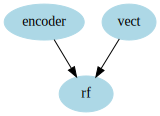

In [6]:
gpipe = sklearn_model_from_param(json_des)
gpipe
gpipe.graphviz

In [7]:
gpipe.models["encoder"]

NumericalEncoder(columns_to_use=['BLOCKNUMBERTOKEN', 'DATETOKEN',
                                 'CURRENCYTOKEN'],
                 desired_output_type='DataFrame', drop_unused_columns=False,
                 drop_used_columns=True, encoding_type='dummy',
                 max_cum_proba=0.95, max_modalities_number=100,
                 max_na_percentage=0.05, min_modalities_number=20,
                 min_nb_observations=10, regex_match=False)

In [8]:
gpipe.models["rf"]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
gpipe.models["vect"]

CountVectorizerWrapper(analyzer='char', column_prefix='BAG',
                       columns_to_use=['STRINGLINE'],
                       desired_output_type='SparseArray',
                       drop_unused_columns=True, drop_used_columns=True,
                       max_df=1.0, max_features=None, min_df=1,
                       ngram_range=(1, 4), regex_match=False, tfidf=False,
                       vocabulary=None)

If a model has another has its parameters, like a 'BoxCoxTargetTransformer' or 'Stacker'... it works the same

In [10]:
json_full = "BoxCoxTargetTransformer",{"model":json_des,"ll":0}
json_full

('BoxCoxTargetTransformer',
 {'model': ('GraphPipeline',
   {'models': {'encoder': ('NumericalEncoder',
      {'columns_to_use': ['BLOCKNUMBERTOKEN', 'DATETOKEN', 'CURRENCYTOKEN']}),
     'vect': ('CountVectorizerWrapper',
      {'analyzer': 'char',
       'ngram_range': (1, 4),
       'columns_to_use': ['STRINGLINE']}),
     'rf': ('RandomForestClassifier', {'n_estimators': 500})},
    'edges': [('encoder', 'rf'), ('vect', 'rf')]}),
  'll': 0})

In [11]:
model = sklearn_model_from_param(json_full)
model

BoxCoxTargetTransformer(ll=0,
                        model=GraphPipeline(edges=[('encoder', 'rf'),
                                                   ('vect', 'rf')],
                                            models={'encoder': NumericalEncoder(columns_to_use=['BLOCKNUMBERTOKEN',
                                                                                                'DATETOKEN',
                                                                                                'CURRENCYTOKEN'],
                                                                                desired_output_type='DataFrame',
                                                                                drop_unused_columns=False,
                                                                                drop_used_columns=True,
                                                                                encoding_type='dummy',
                                                                  

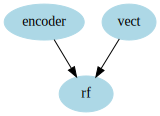

In [12]:
model.model.graphviz

In [13]:
from aikit.model_definition import DICO_NAME_KLASS

For it to work : the model should be added within <b>DICO_NAME_KLASS</b>

In [14]:
DICO_NAME_KLASS

registered klasses :
AgglomerativeClusteringWrapper
BoxCoxTargetTransformer
CdfScaler
Char2VecVectorizer
ColumnsSelector
CountVectorizerWrapper
DBSCANWrapper
ExtraTreesClassifier
ExtraTreesRegressor
FeaturesSelectorClassifier
FeaturesSelectorRegressor
GraphPipeline
KMeansTransformer
KMeansWrapper
LGBMClassifier
LGBMRegressor
Lasso
LogisticRegression
NumImputer
NumericalEncoder
OutSamplerTransformer
PCAWrapper
PassThrough
Pipeline
RandomForestClassifier
RandomForestRegressor
Ridge
StackerClassifier
StackerRegressor
TargetEncoderClassifier
TargetEncoderEntropyClassifier
TargetEncoderRegressor
TextDefaultProcessing
TextDigitAnonymizer
TextNltkProcessing
TruncatedSVDWrapper
Word2VecVectorizer

For it to work, each model should be registered